In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pickle import load
from matplotlib.ticker import MaxNLocator

from modules.sink.data_types import CombinedSinkData
from modules.sink.rates_and_tscales import t_rms_mach_near_end,mdotB,tBH_to_tBHA

sns.set(style="ticks")
sns.set_palette('colorblind')

In [121]:
def process_sink(fn,str_beta):
    fin=open(fn,'r')
    master_sink=load(fin)
    fin.close()
    #corr mdots 
    end_t,end_mach= t_rms_mach_near_end(str_beta)
    master_sink.rm_mdot_systematics(end_t,end_mach)
    return master_sink

str_betas=['bInf','b1','b1e-2']
fns=['data/processed/bInf_sd2/lev5/master_sink_bInf.pickle',\
     'data/processed/b1_sd2/lev5/master_sink_b1.pickle',\
     'data/processed/b0.01_sd2/lev5/master_sink_b1e-2.pickle']
sink={}
for fn,str_beta in zip(fns,str_betas): sink[str_beta]= process_sink(fn,str_beta)

In [125]:
def rm_last_ticklabel(ax):
    labels=ax.get_xticks().tolist()
    labels=np.array(labels).astype(int) #prevent from making float
    labels=list(labels)
    labels[-1]=''
    ax.set_xticklabels(labels)

#kwargs
laba=dict(fontweight='bold',fontsize='xx-large')
kwargs_axtext=dict(fontweight='bold',fontsize='x-large',va='top',ha='left')
#setup plot
fig,ax=plt.subplots(1,3,figsize=(9,3),sharey=True)
plt.subplots_adjust(wspace=0)
#
addtext={}
addtext['bInf']=r'$\mathbf{ \beta_0 = \infty }$'
addtext['b1']= r'$\mathbf{ \beta_0 = 1 }$'
addtext['b1e-2']=r'$\mathbf{ \beta_0 = 0.01 }$'
#plot lines
for cnt,str_beta in zip(range(3),str_betas):
    ax[cnt].plot(sink[str_beta].tnorm(),np.median(sink[str_beta].mdot,axis=0)/mdotB(),c='k',label='Raw')
    ax[cnt].plot(sink[str_beta].tnorm(),np.median(sink[str_beta].mdot_vcorr,axis=0)/mdotB(),c='b',label='Corrected')
    #2nd axis
    ax2 = ax[cnt].twiny()
    ax2.set_xlabel(r'$\mathbf{ t/t_{\rm{ABH}} }$',**laba)
    ax2.plot(tBH_to_tBHA(sink[str_beta].tnorm(),str_beta),np.median(sink[str_beta].mdot_vcorr,axis=0)/mdotB(),visible=False)
    #add text
    ax[cnt].text(0.05,0.95,addtext[str_beta],transform=ax[cnt].transAxes,**kwargs_axtext)
    #rm overlapping ticks  
    if cnt < 2:
        rm_last_ticklabel(ax[cnt])
        rm_last_ticklabel(ax2)
#label
for i in range(3): 
    xlab= ax[i].set_xlabel(r'$\mathbf{ t/t_{\rm{BH}} }$',**laba)
    ax[i].set_yscale('log')
    ax[i].set_ylim(1e-4,6e-3)
ylab= ax[0].set_ylabel(r'$\mathbf{Log_{\rm{10}} \,\, \dot{M}/\dot{M}_{\rm{B}} }$',**laba)
ax[2].legend(loc=4,fontsize='small')
#save
plt.savefig('raw_corrected.png', bbox_extra_artists=[xlab,ylab], bbox_inches='tight')

In [123]:
#kwargs
laba=dict(fontweight='bold',fontsize='xx-large')
kwargs_axtext=dict(fontweight='bold',fontsize='x-large',va='bottom',ha='center')
#setup plot
fig,ax=plt.subplots(1,3,figsize=(9,3),sharey=True)
plt.subplots_adjust(wspace=0)
#
addtext={}
addtext['bInf']=r'$\mathbf{ \beta_0 = \infty }$'
addtext['b1']= r'$\mathbf{ \beta_0 = 1 }$'
addtext['b1e-2']=r'$\mathbf{ \beta_0 = 0.01 }$'
#plot lines
for cnt,str_beta in zip(range(3),str_betas):
    for i in range(64):
        ax[cnt].plot(sink[str_beta].tnorm(),sink[str_beta].mdot_vcorr[i,:]/mdotB(),lw=1)
    #add text
    title=ax[cnt].text(0.5,1.05,addtext[str_beta],transform=ax[cnt].transAxes,**kwargs_axtext)
#     ax[cnt].set_title(addtext[str_beta],**laba)
    #rm overlapping ticks  
    if cnt < 2:
        rm_last_ticklabel(ax[cnt])
#label
for i in range(3): 
    xlab= ax[i].set_xlabel(r'$\mathbf{ t/t_{\rm{BH}} }$',**laba)
    ax[i].set_yscale('log')
    ax[i].set_ylim(1e-6,1e-1)
ylab= ax[0].set_ylabel(r'$\mathbf{Log_{\rm{10}} \,\, \dot{M}/\dot{M}_{\rm{B}} }$',**laba)
ax[2].legend(loc=4,fontsize='small')
#save
plt.savefig('all_rates.png', bbox_extra_artists=[xlab,ylab], bbox_inches='tight')

In [99]:
fig,ax=plt.subplots()
ax.plot(range(10))
# labels = [item.get_text() for item in ax.get_xmajorticklabels()]
# print labels
# print ax.get_xticks
labels=ax.get_xticks().tolist()
labels[-1]=''
ax.set_xticklabels(labels)
plt.show()

/Users/kburleigh/miniconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [3]:


# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (3, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", col_wrap=5, size=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o", ms=4)

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)
plt.show()

In [ ]:
#K06 Mdot
def func_wstar(w,Msink,cs):
    rB= fc.G*Msink/cs**2
    return w*rB/cs
def func_fstar(w_star):
    if w_star > 1e4:
        raise ValueError
    else:
        return 1./(1+w_star**0.9)
def Mdot_wstar(Msink,rho_inf,cs,f_star):
    return 4*np.pi*rho_inf*(fc.G*Msink)**2/cs**3*0.34*f_star
def Mdot_BH(rho_inf,Msink,cs,MachS):
    lam=1.1
    head=4.*np.pi*rho_inf*(fc.G*Msink)**2/cs**3
    tail= ((lam**2+MachS**2)/(1+MachS**2)**4)**0.5
    return head*tail
def Mdot_turb(Mdot_BH,Mdot_wstar):
    return (Mdot_BH**-2+Mdot_wstar**-2)**-0.5

#Lee14 Mdot, eqns 27,30
def Mdot_B(Msink,rho_inf,cs):
    lam=1.1
    return 4.*np.pi*lam*(fc.G*Msink)**2*rho_inf/cs**3
def script_MBH(MachS):
    lam=1.1
    head= (1+MachS**4)**0.333
    tail=(1+(MachS/lam)**2)**(1./6)
    return head/tail
def Mdot_par(script_MBH,Mdot_B,beta):
    beta_ch= 18.3
    n=0.94
    head=Mdot_B/script_MBH**2
    tail=(script_MBH**n+(beta_ch/beta)**(n/2))**(-1/n)
    return head*tail
def Mdot_perp(script_MBH,Mdot_B,beta):
    beta_ch= 18.3
    n=0.94
    head=Mdot_B/script_MBH
    tail=(script_MBH**n+(beta_ch/beta)**(n/2))**(-1/n)
    a=head*tail
    b=Mdot_B/script_MBH**3
    print "a,b= ",a,b
    print "min= ",min([a,b])
    #can use min() when args are arrays
#     minima= a.copy()
#     ind=np.where(a<b)[0]
#     minima[ind]= a[ind]
#     ind=np.where(a>=b)[0]
#     minima[ind]= b[ind]
#     return minima
    return min([a,b])

#Calc all Mdot
class Mdots_K06():
    def __init__(self,Msink,rho_inf,cs,f_star,MachS):
        self.wstar= Mdot_wstar(Msink,rho_inf,cs,f_star)
        self.BH= Mdot_BH(rho_inf,Msink,cs,MachS) 
        self.turb= Mdot_turb(self.BH,self.wstar)
class Mdots_Lee14():
    def __init__(self,Msink,rho_inf,cs,lee_script_MBH,beta):
        self.B= Mdot_B(Msink,rho_inf,cs)
        self.par= Mdot_par(lee_script_MBH,self.B,beta)
        self.perp= Mdot_perp(lee_script_MBH,self.B,beta)
class Mdots():
    def __init__(self,Msink,rho_inf,cs,f_star,MachS,lee_script_MBH,beta):
        self.K06= Mdots_K06(Msink,rho_inf,cs,f_star,MachS)
        self.Lee14= Mdots_Lee14(Msink,rho_inf,cs,lee_script_MBH,beta)
###

def plot_Mdots(fsave,mdot,sink,tB):
    '''ylim (optional)'''
    fig,ax= plt.subplots(figsize=(5,5))
    time= (sink.time - sink.time[0])/tB
    M0= mdot.Lee14.B
    labs=[r'$\dot{M}_{sink}$',\
          r'$\dot{M}_{B}$',r'$\dot{M}_{BH}$',\
          r'$\dot{M}_{\omega}$',r'$\dot{M}_{turb}$',\
          r'$\dot{M}_{B \parallel}$',r'$\dot{M}_{B \perp}$']
    ax.plot(time,np.average(sink.Mdot,axis=1)/M0,"k-*",label=labs[0])
    ax.hlines(mdot.Lee14.B/M0,time.min(),time.max(),\
              colors="k",linestyle="solid",label=labs[1])
    ax.hlines(mdot.K06.BH/M0,time.min(),time.max(),\
              colors="k",linestyle="dashed",label=labs[2])
    ax.hlines(mdot.K06.wstar/M0,time.min(),time.max(),\
              colors="b",linestyle="solid",label=labs[3])
    ax.hlines(mdot.K06.turb/M0,time.min(),time.max(),\
              colors="b",linestyle="dashed",label=labs[4])
    ax.hlines(mdot.Lee14.par/M0,time.min(),time.max(),\
              colors="r",linestyle="solid",label=labs[5])
    ax.hlines(mdot.Lee14.perp/M0,time.min(),time.max(),\
              colors="r",linestyle="dashed",label=labs[6])
    ax.set_xlabel(r"$\mathbf{t/t_B}$")
    ax.set_ylabel(r"$\mathbf{\dot{M}/\dot{M}_B}$")
    ax.legend(loc=(1.01,0.01),ncol=1)
    ax.set_yscale('log')
#     if ylim: ax.set_ylim([ylim[0],ylim[1]])
    fig.savefig(fsave,dpi=150)

###main
class TimeSeries():
    def __init__(self,files):
        '''files: hdf5 file list'''
        self.Time= np.zeros(len(files)) -1
        self.Rho= self.Time.copy()
        self.MachS= self.Time.copy()
        self.Beta= self.Time.copy()
        self.MachA= self.Time.copy()
        self.Curl= self.Time.copy()
        self.Brms= self.Time.copy()

class SinkData():
    def __init__(self,NSinks,NSinkFiles):
        shape= (NSinkFiles,NSinks)
        self.time= np.zeros(NSinkFiles)-1
        self.mass= np.zeros(shape)-1
        self.x= np.zeros(shape)-1
        self.y= np.zeros(shape)-1
        self.z= np.zeros(shape)-1
        self.Mdot= np.zeros(shape)-1 #Mdot of sink particles
    def get_time(self,f_hdf5):
        for cnt,f in enumerate(f_hdf5):
            print "sink time: loading %s" % f
            pf=load(f)
            self.time[cnt]= pf.current_time
    def get_MassPosMdot(self,f_sink):
        '''f_sink: list of .sink files'''
        for cnt in range(len(f_sink)):
            print "sink MassPos: loading %s" % f_sink[cnt]
            mass,x,y,z= np.loadtxt(f_sink[cnt],dtype='float',\
                                   skiprows=1,usecols=(0,1,2,3),unpack=True)
            self.mass[cnt,:]= mass
            self.x[cnt,:]= x
            self.y[cnt,:]= y
            self.z[cnt,:]= z
        #calc Mdot
        if self.time[0].astype('int') == -1:
            print "time not loaded"
            raise ValueError
        else:
            self.Mdot[0,:]=0.
            for cnt in np.arange(1,len(f_sink)):
                deltaM= self.mass[cnt,:] -self.mass[cnt-1,:] 
                deltaT= self.time[cnt]- self.time[cnt-1]
                self.Mdot[cnt,:]= deltaM/deltaT

In [94]:
path='/Users/kburleigh/GradSchool/Research/w_McKee/orion2_myFiles/images/'
path+='pleiades/SinkSep/Krum06/fsol_1/drive/sinks_logRbLbox_-1/'
path1=path
path2=path+'contd_evolving/'

class Tmp():
    def __init__(self):
        pass

class TimeSteps():
    def __init__(self):
        self.path1=Tmp()
        self.path2=Tmp()

In [95]:
t= TimeSteps()
t.path1.t0= np.loadtxt(path1+'tsteps_lev0.txt',dtype=np.float64,usecols=(5,),unpack=True)
t.path1.t1= np.loadtxt(path1+'tsteps_lev1.txt',dtype=np.float64,usecols=(5,),unpack=True)
t.path1.t2= np.loadtxt(path1+'tsteps_lev2.txt',dtype=np.float64,usecols=(5,),unpack=True)
t.path1.t3= np.loadtxt(path1+'tsteps_lev3.txt',dtype=np.float64,usecols=(5,),unpack=True)
t.path1.t4= np.loadtxt(path1+'tsteps_lev4.txt',dtype=np.float64,usecols=(5,),unpack=True)
t.path1.t5= np.loadtxt(path1+'tsteps_lev5.txt',dtype=np.float64,usecols=(5,),unpack=True)
t.path2.t0= np.loadtxt(path2+'tsteps_lev0.txt',dtype=np.float64,usecols=(5,),unpack=True)
t.path2.t1= np.loadtxt(path2+'tsteps_lev1.txt',dtype=np.float64,usecols=(5,),unpack=True)
t.path2.t2= np.loadtxt(path2+'tsteps_lev2.txt',dtype=np.float64,usecols=(5,),unpack=True)
t.path2.t3= np.loadtxt(path2+'tsteps_lev3.txt',dtype=np.float64,usecols=(5,),unpack=True)
t.path2.t4= np.loadtxt(path2+'tsteps_lev4.txt',dtype=np.float64,usecols=(5,),unpack=True)
t.path2.t5= np.loadtxt(path2+'tsteps_lev5.txt',dtype=np.float64,usecols=(5,),unpack=True)

In [96]:
tstep= TimeSteps()
tstep.path1.t0=t.path1.t0[1:]-t.path1.t0[:-1]
tstep.path1.t1=t.path1.t1[1:]-t.path1.t1[:-1]
tstep.path1.t2=t.path1.t2[1:]-t.path1.t2[:-1]
tstep.path1.t3=t.path1.t3[1:]-t.path1.t3[:-1]
tstep.path1.t4=t.path1.t4[1:]-t.path1.t4[:-1]
tstep.path1.t5=t.path1.t5[1:]-t.path1.t5[:-1]
tstep.path2.t0=t.path2.t0[1:]-t.path2.t0[:-1]
tstep.path2.t1=t.path2.t1[1:]-t.path2.t1[:-1]
tstep.path2.t2=t.path2.t2[1:]-t.path2.t2[:-1]
tstep.path2.t3=t.path2.t3[1:]-t.path2.t3[:-1]
tstep.path2.t4=t.path2.t4[1:]-t.path2.t4[:-1]
tstep.path2.t5=t.path2.t5[1:]-t.path2.t5[:-1]

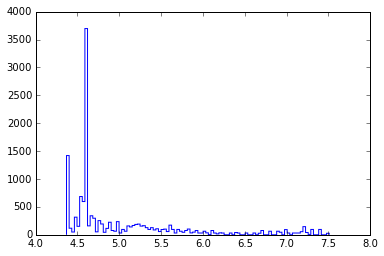

In [70]:
(n,bins,patches)= plt.hist(np.log10(tstep.t5),bins=100,histtype='step')

In [105]:
a={'0':'56','1':range(10),'2':range(20)}
type(len(a.keys()))

int

In [107]:
floor(6.7)

6.0

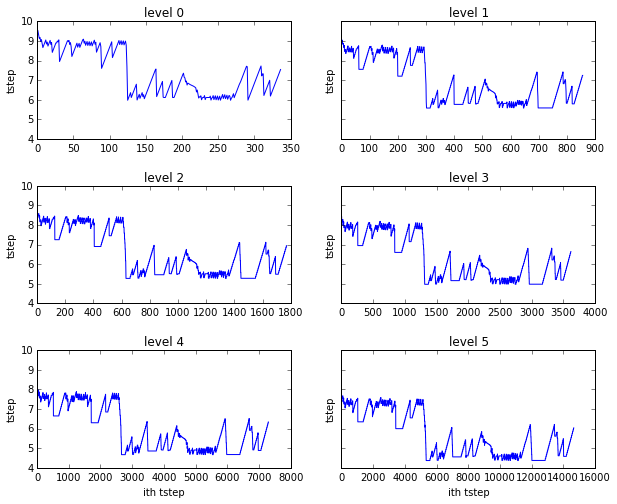

In [97]:
fig,axis=plt.subplots(3,2,figsize=(10,8),sharey=True)
ax=axis.flatten()
ax[0].plot(range(len(tstep.path1.t0)),np.log10(tstep.path1.t0))
ax[1].plot(range(len(tstep.path1.t1)),np.log10(tstep.path1.t1))
ax[2].plot(range(len(tstep.path1.t2)),np.log10(tstep.path1.t2))
ax[3].plot(range(len(tstep.path1.t3)),np.log10(tstep.path1.t3))
ax[4].plot(range(len(tstep.path1.t4)),np.log10(tstep.path1.t4))
ax[5].plot(range(len(tstep.path1.t5)),np.log10(tstep.path1.t5))
for i in range(6):
    ax[i].set_title('level '+str(i))
    ax[i].set_ylabel('tstep')
    if i==4 or i==5: ax[i].set_xlabel('ith tstep')   
fig.subplots_adjust(hspace=0.4)

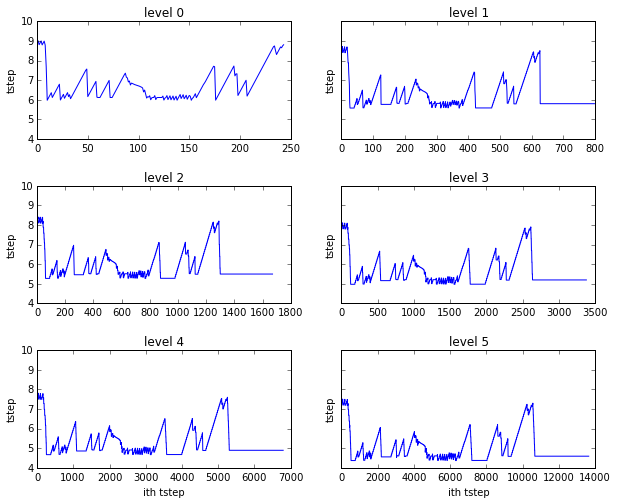

In [98]:
fig,axis=plt.subplots(3,2,figsize=(10,8),sharey=True)
ax=axis.flatten()
ax[0].plot(range(len(tstep.path2.t0)),np.log10(tstep.path2.t0))
ax[1].plot(range(len(tstep.path2.t1)),np.log10(tstep.path2.t1))
ax[2].plot(range(len(tstep.path2.t2)),np.log10(tstep.path2.t2))
ax[3].plot(range(len(tstep.path2.t3)),np.log10(tstep.path2.t3))
ax[4].plot(range(len(tstep.path2.t4)),np.log10(tstep.path2.t4))
ax[5].plot(range(len(tstep.path2.t5)),np.log10(tstep.path2.t5))
for i in range(6):
    ax[i].set_title('level '+str(i))
    ax[i].set_ylabel('tstep')
    if i==4 or i==5: ax[i].set_xlabel('ith tstep')   
fig.subplots_adjust(hspace=0.4)


In [39]:
for i in np.arange(10,17): 
    a='%.25g' % t.t0[i]
    print a


30087575852470.921875
30087576791581.12109375
30087577965468.87109375
30087579432828.55078125
30087581267028.16015625
30087583559777.66015625
30087584858215.16015625


In [30]:
t.t0[10:17]

array([  3.00875755e+13,   3.00875776e+13,   3.00875776e+13,
         3.00875797e+13,   3.00875818e+13,   3.00875839e+13,
         3.00875839e+13], dtype=float32)

In [33]:
t.t0[10:17]

array([  3.00875759e+13,   3.00875768e+13,   3.00875780e+13,
         3.00875794e+13,   3.00875813e+13,   3.00875836e+13,
         3.00875849e+13])

tstep0
count  2.440000e+02
mean   6.316632e+07
std    1.806043e+08
min    9.384290e+05
25%    1.527285e+06
50%    3.962517e+06
75%    1.420825e+07
max    1.032563e+09

[8 rows x 1 columns]

In [107]:
spath="./"
path="/Users/kburleigh/GradSchool/Research/w_McKee/"
path=path+"orion2_myFiles/images/brc/SinkSep/S-8_SS-25/MHD/beta-10/"
fin=open(path+"tseries.dump",'r')
(ts,cs_iso,tB)=pickle.load(fin)
fin.close()
fin=open(path+"sink_data.pickle",'r')
sink=pickle.load(fin)
fin.close()

#evaluated once, at insert of sinks
Curl=ts.Curl[-1]
MachS= ts.MachS[-1]
Rho=ts.Rho[-1]
Beta=ts.Beta[-1]
Msinks_const= sink.mass[0,0] #sink.mass.shape = (Nfiles,Nsinks)
rB= fc.G*Msinks_const/cs_iso**2
w_star = Curl*rB/cs_iso
print "w_star = %f" % w_star
f_star= func_fstar(w_star)
lee_script_MBH= script_MBH(MachS)

mdot= Mdots(Msinks_const,Rho,cs_iso,f_star,MachS,lee_script_MBH,Beta)
#save mdot analystic vals
fout=open(spath+"analytic_mdots.pickle","w")
pickle.dump(mdot,fout)
fout.close()

w_star = 33.754245
a,b=  7.25025273864e+17 3.74857758382e+17
min=  3.74857758382e+17


In [108]:
mdot.K06.

SyntaxError: invalid syntax (<ipython-input-108-eaceea950463>, line 1)

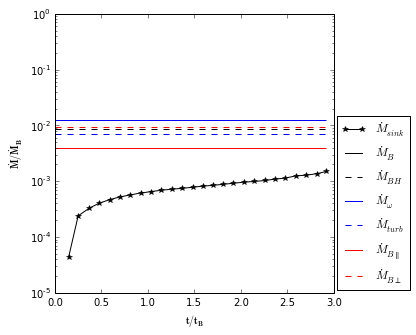

In [109]:
fsave=spath+"mdot_results.png"
plot_Mdots(fsave,mdot,sink,tB)#ylim=(10**-4,10**1))

In [3]:
class TimeSeries():
    def __init__(self,files):
        '''files: hdf5 file list'''
        self.Time= np.zeros(len(files)) -1
        self.Rho= self.Time.copy()
        self.MachS= self.Time.copy()
#         self.Beta= self.Time.copy()
#         self.MachA= self.Time.copy()
        self.Curl= self.Time.copy()
#         self.Brms= self.Time.copy()

In [9]:
path='/Users/kburleigh/GradSchool/Research/w_McKee/orion2_myFiles/images/'
path+='pleiades/SinkSep/Krum06/fsol_1/drive/HD/'
fin=open(path+'tseries.dump')
(a,b,c)=pickle.load(fin)
fin.close()

In [10]:
a.Time

array([  0.00000000e+00,   1.99935335e+12,   3.99767979e+12,
         5.99913077e+12,   7.99690616e+12,   9.99843426e+12,
         1.19991115e+13,   1.39987767e+13,   1.59989962e+13,
         1.79979424e+13,   1.99984826e+13,   2.19981774e+13,
         2.39990925e+13,   2.59984555e+13,   2.79989678e+13,
         2.99973497e+13,   3.00001588e+13])

In [11]:
class SinkData():
    def __init__(self,NSinks,NSinkFiles):
        shape= (NSinkFiles,NSinks)
        self.time= np.zeros(NSinkFiles)-1
        self.mass= np.zeros(shape)-1
        self.x= np.zeros(shape)-1
        self.y= np.zeros(shape)-1
        self.z= np.zeros(shape)-1
        self.Mdot= np.zeros(shape)-1 #Mdot of sink particles
    def get_times(self,f_hdf5):
        for cnt,f in enumerate(f_hdf5):
            print "getting times: loading %s" % f
            pf=load(f)
            self.time[cnt]= pf.current_time
    def get_MassPosMdot(self,f_sink):
        '''f_sink: list of .sink files'''
        for cnt in range(len(f_sink)):
            print "getting sink props: loading %s" % f_sink[cnt]
            mass,x,y,z= np.loadtxt(f_sink[cnt],dtype='float',\
                                   skiprows=1,usecols=(0,1,2,3),unpack=True)
            self.mass[cnt,:]= mass
            self.x[cnt,:]= x
            self.y[cnt,:]= y
            self.z[cnt,:]= z
        #calc Mdot
        if self.time[0].astype('int') == -1:
            print "time not loaded"
            raise ValueError
        else:
            self.Mdot[0,:]=0.
            for cnt in np.arange(1,len(f_sink)):
                deltaM= self.mass[cnt,:] -self.mass[cnt-1,:]
                deltaT= self.time[cnt]- self.time[cnt-1]
                self.Mdot[cnt,:]= deltaM/deltaT

In [12]:
path='/Users/kburleigh/GradSchool/Research/w_McKee/orion2_myFiles/images/'
path+='pleiades/SinkSep/Krum06/fsol_1/drive/HD/sinks_logRbLbox_-1/'
fin=open(path+'sink_data.pickle')
sink=pickle.load(fin)
fin.close()

In [32]:
sink.Mdot[4,:]

array([  3.65031806e+14,   8.61737883e+14,   4.74133103e+14,
         1.40669731e+14,   1.18881929e+15,   3.62465831e+13,
         5.59304913e+14,   9.74841274e+14,   6.99753172e+14,
         3.34729312e+14,   6.46000245e+14,   2.03204703e+14,
         1.09366527e+14,   1.92611106e+15,   1.17235395e+15,
         2.29939804e+14,   2.35376778e+15,   2.41193184e+14,
         1.49953213e+14,   4.51035153e+14,   1.34454351e+15,
         1.66640740e+14,   1.09209277e+15,   3.94546669e+13,
         1.47232107e+15,   1.38858180e+15,   3.16577688e+14,
         1.04937454e+14,   1.33632053e+15,   8.21259490e+14,
         8.69150433e+14,   9.87571919e+14,   1.96536687e+15,
         2.37562725e+15,   9.40427994e+15,   4.22322805e+14,
         3.98544025e+14,   2.52532661e+14,   5.43729746e+14,
         4.25008600e+14,   2.45210497e+14,   9.90324226e+13,
         7.14458550e+15,   6.24376837e+14,   4.50586613e+14,
         3.41742488e+13,   1.08005418e+15,   5.54786722e+13,
         4.14970463e+14,

### sink.time.shape